In [16]:
# import packages and plot setting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy import units as u
# you can get the units by dot notation
L_sun = 3.8e33*u.erg/u.s
L_sun

<Quantity 3.8e+33 erg / s>

In [3]:
from astropy import constants as const
# you can also get common constants through constants 
const.L_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [4]:
# convert to different units
const.L_sun.to(u.erg/u.s)

<Quantity 3.828e+33 erg / s>

In [5]:
# or just use the cgs mode
const.L_sun.cgs

<Quantity 3.828e+33 erg / s>

In [6]:
const.M_sun.cgs

<Quantity 1.9884754153381438e+33 g>

In [7]:
const.kpc.cgs

<Quantity 3.085677581467192e+21 cm>

In [9]:
"""
if the Black Hole has a density like water 1 g/cm^3, then we get:

M=c^3/G^1.5rho^0.5

"""

rho = 1*u.g/u.cm**3
M = const.c**3/(const.G**3*rho)**(1/2)
M

<Quantity 4.941684295856452e+40 cm(3/2) kg(3/2) / (g(1/2) m(3/2))>

In [10]:
M.decompose()

<Quantity 1.5626977852391766e+39 kg>

In [11]:
M.to(u.M_sun)

<Quantity 785877347.6329035 solMass>

In [12]:
"""
The peak frequency of the synchrotron spectrum:
v = 0.3 * 3 * gamma^2 *e * B/(4pim0c^2)
find out the v when gamma=10^3 B=10^-4 G
"""

v = 3*(1e3)**2*const.e.gauss*1e-4*u.Gauss/(4*np.pi*const.m_e*const.c**2)
v.decompose()

<Quantity 0.0004429065358016289 kg(1/2) / (A m(1/2) s)>

In [14]:
gauss_G = (u.g/u.cm)**(0.5)/u.s
v_c = 3*(1e3)**2*const.e.gauss*1e-4*gauss_G/(4*np.pi*const.m_e*const.c)
v_c.to(u.Hz)

<Quantity 419887351.1479232 Hz>

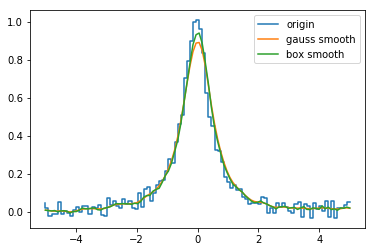

In [17]:
# use covolution to smooth data -- 1D data
from astropy.modeling.models import Lorentz1D
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
lorentz = Lorentz1D(1, 0, 1)
x = np.linspace(-5, 5, 100)
data_1D = lorentz(x) + 0.1 * (np.random.rand(100) - 0.5)
# smooth with guassian kernal with standard deviation equal to 2
gauss_kernel = Gaussian1DKernel(2) 
smoothed_data_gauss = convolve(data_1D, gauss_kernel)
# smooth with boxkenal with a width equal to 5
box_kernel = Box1DKernel(5)
smoothed_data_box = convolve(data_1D, box_kernel)
if True: # plot the results
    fig, ax = plt.subplots(1)
    ax.step(x, data_1D, label='origin')
    ax.plot(x, smoothed_data_gauss, label='gauss smooth')
    ax.plot(x, smoothed_data_box, label='box smooth')
    plt.legend()

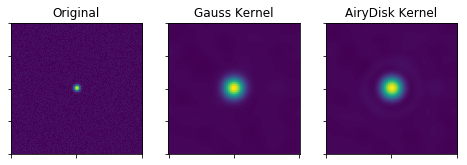

In [18]:
# 2-D convulution
from astropy.convolution import convolve, Gaussian2DKernel, AiryDisk2DKernel
from astropy.modeling.models import Gaussian2D
gauss = Gaussian2D(10, 0, 0, 3, 3)
# Fake image data including noise
x = np.arange(-100, 101)
y = np.arange(-100, 101)
x, y = np.meshgrid(x, y)
data_2D = gauss(x, y) + 0.5 * (np.random.rand(201, 201) - 0.5)
# convolute with gauss kernal
gauss_kernel = Gaussian2DKernel(10)
smoothed_data_gauss = convolve(data_2D, gauss_kernel)
# convolute with AiryDisk kernal
airydisk_kernel = AiryDisk2DKernel(30)
smoothed_data_airydisk = convolve(data_2D, airydisk_kernel)
if True: # plots
    fig, ax = plt.subplots(1,3, figsize=(8,3))
    ax[0].imshow(data_2D)
    ax[0].set_title('Original')
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])
    ax[1].imshow(smoothed_data_gauss)
    ax[1].set_title('Gauss Kernel')
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    ax[2].imshow(smoothed_data_airydisk)
    ax[2].set_title('AiryDisk Kernel')
    ax[2].set_xticklabels([])
    ax[2].set_yticklabels([])

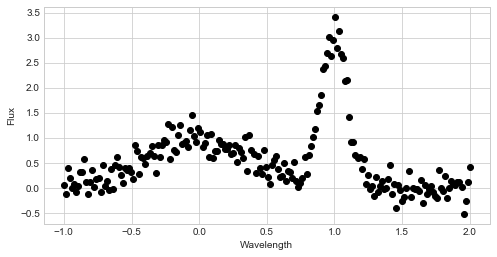

In [19]:
from astropy.modeling import models

# Generate fake data
np.random.seed(502)
g1 = models.Gaussian1D(1, 0, 0.4)
g2 = models.Gaussian1D(3, 1., 0.1)
x = np.linspace(-1, 2, 200)
y = g1(x) + g2(x) + np.random.normal(0., 0.2, x.shape)
if True: # Plot the data
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(8,4))
    plt.plot(x, y, 'ko')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')

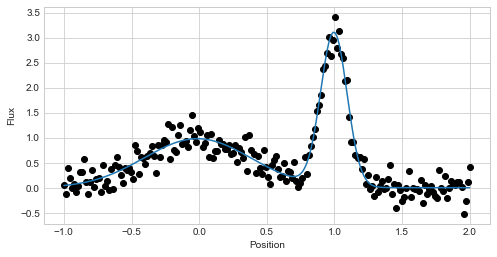

In [20]:

from astropy.modeling.models import Gaussian1D
from astropy.modeling import fitting

TwoGaussians = Gaussian1D + Gaussian1D
# get the initial guess
gg_init = TwoGaussians(amplitude_0=1.0, mean_0=0., stddev_0=0.5,
                       amplitude_1=3.5, mean_1=1., stddev_1=0.2)
# use LevMarLSQFitter do the fitting
fitter = fitting.LevMarLSQFitter()
gg_fit = fitter(gg_init, x, y)
if True: #plots
    plt.figure(figsize=(8,4))
    plt.plot(x, y, 'ko')
    plt.plot(x, gg_fit(x))
    plt.xlabel('Position')
    plt.ylabel('Flux')

In [21]:
gg_fit

<CompoundModel0(amplitude_0=0.9790487187118952, mean_0=-0.012721308801200933, stddev_0=0.395199775003038, amplitude_1=3.072367869861395, mean_1=0.9961444975700025, stddev_1=0.09731904626735922)>

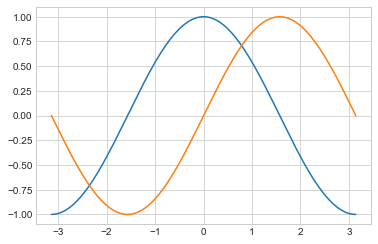

In [22]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)
plt.show()

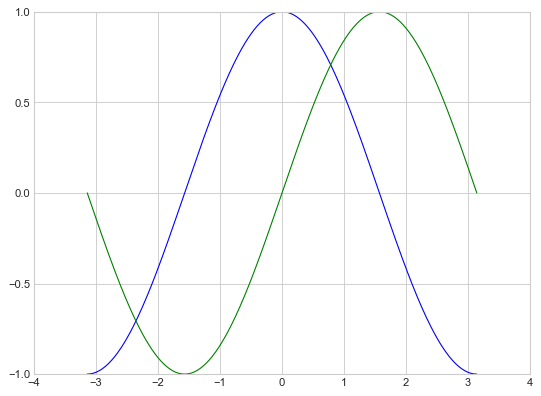

In [23]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)
# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")
# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")
# Set x limits
plt.xlim(-4.0, 4.0)
# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
# Set y limits
plt.ylim(-1.0, 1.0)
# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))
# Save figure using 72 dots per inch
# plt.savefig("exercise_2.png", dpi=72)
# Show result on screen
plt.show()


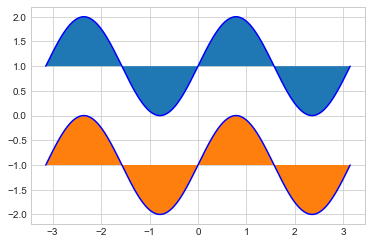

In [29]:
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2 * X)
plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.fill_between(X,Y+1,y2=1)
plt.plot(X, Y - 1, color='blue', alpha=1.00)
plt.fill_between(X,Y-1,y2=-1)


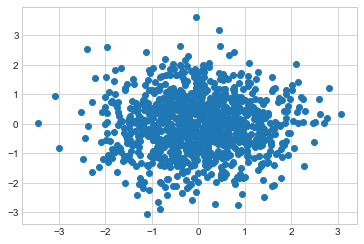

In [30]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
plt.scatter(X,Y)

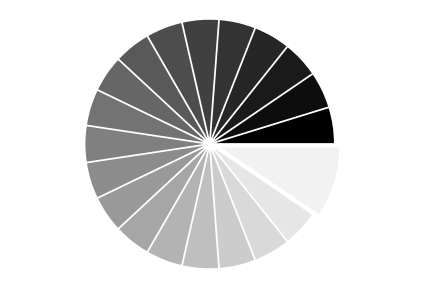

In [32]:
n = 20
Z = np.ones(n)
Z[-1] *= 2
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.pie(Z, explode=Z*.05, colors = ['%f ' % (i/float(n)) for i in range(n)])
plt.axis('equal')
plt.xticks(())
plt.yticks()
plt.show()


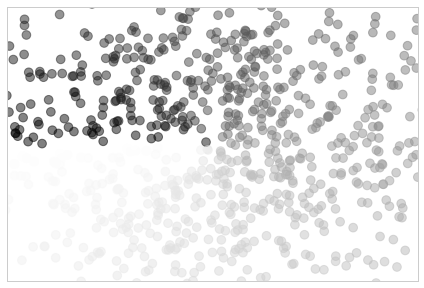

In [33]:
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=T, alpha=.5)
plt.xlim(-1.5, 1.5)
plt.xticks(())
plt.ylim(-1.5, 1.5)
plt.yticks(())
plt.show()


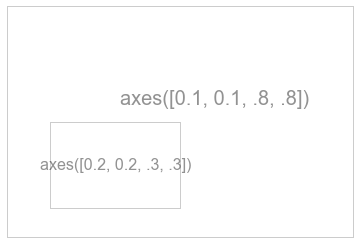

In [34]:
plt.axes([.1, .1, .8, .8])
plt.xticks(())
plt.yticks(())
plt.text(.6, .6, 'axes([0.1, 0.1, .8, .8])', ha='center', va='center',
size=20, alpha=.5)
plt.axes([.2, .2, .3, .3])
plt.xticks(())
plt.yticks(())
plt.text(.5, .5, 'axes([0.2, 0.2, .3, .3])', ha='center', va='center',
size=16, alpha=.5)
plt.show()

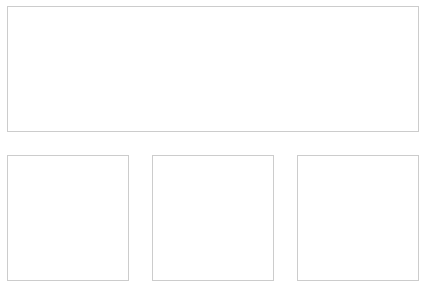

In [35]:
fig = plt.figure()
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
plt.subplot(2, 1, 1)
plt.xticks(()), plt.yticks(())
plt.subplot(2, 3, 4)
plt.xticks(())
plt.yticks(())
plt.subplot(2, 3, 5)
plt.xticks(())
plt.yticks(())
plt.subplot(2, 3, 6)
plt.xticks(())
plt.yticks(())
plt.show()

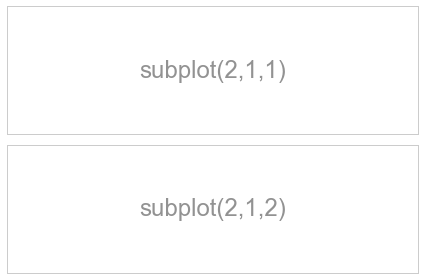

In [39]:
plt.figure(figsize=(6, 4))
plt.subplot(2, 1, 1)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,1,1)', ha='center', va='center',
size=24, alpha=.5)
plt.subplot(2, 1, 2)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,1,2)', ha='center', va='center',
size=24, alpha=.5)
plt.tight_layout()
plt.show()




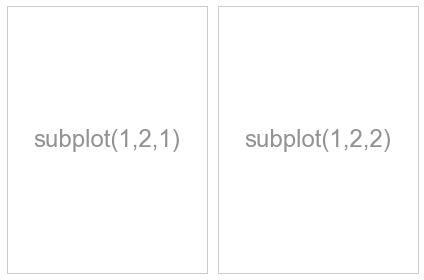

In [40]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(1,2,1)', ha='center', va='center',
size=24, alpha=.5)
plt.subplot(1, 2, 2)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(1,2,2)', ha='center', va='center',
size=24, alpha=.5)
plt.tight_layout()
plt.show()


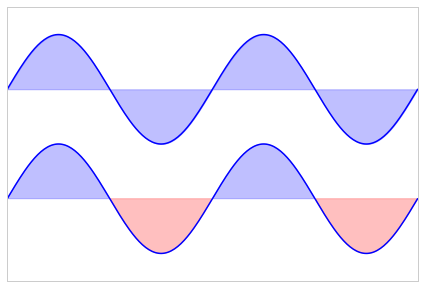

In [41]:
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2 * X)
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y + 1, color='blue', alpha=.25)
plt.plot(X, Y - 1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y - 1, (Y - 1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y - 1, (Y - 1) < -1, color='red', alpha=.25)
plt.xlim(-np.pi, np.pi)
plt.xticks(())
plt.ylim(-2.5, 2.5)
plt.yticks(())
plt.show()


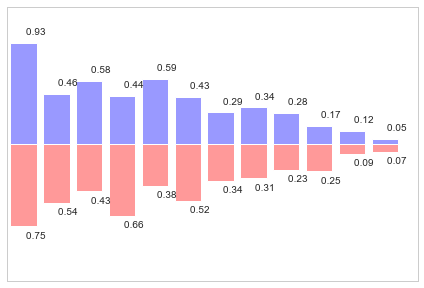

In [43]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')
for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f ' % y, ha='center', va= 'bottom')
for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y - 0.05, '%.2f ' % y, ha='center', va= 'top')
plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())
plt.show()


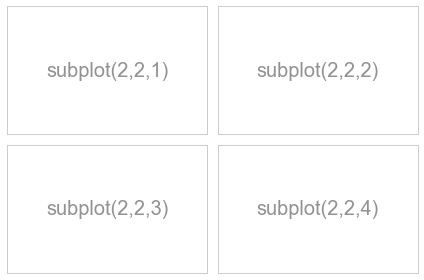

In [44]:
plt.figure(figsize=(6, 4))
plt.subplot(2, 2, 1)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,2,1)', ha='center', va='center',
size=20, alpha=.5)
plt.subplot(2, 2, 2)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,2,2)', ha='center', va='center',
size=20, alpha=.5)
plt.subplot(2, 2, 3)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,2,3)', ha='center', va='center',
size=20, alpha=.5)
plt.subplot(2, 2, 4)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,2,4)', ha='center', va='center',
size=20, alpha=.5)
plt.tight_layout()
plt.show()


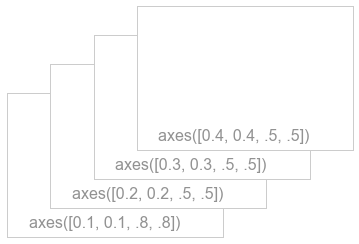

In [47]:
plt.axes([.1, .1, .5, .5])
plt.xticks(())
plt.yticks(())
plt.text(0.1, 0.1, 'axes([0.1, 0.1, .8, .8])', ha='left', va='center',
size=16, alpha=.5)
plt.axes([.2, .2, .5, .5])
plt.xticks(())
plt.yticks(())
plt.text(0.1, 0.1, 'axes([0.2, 0.2, .5, .5])', ha='left', va='center',
size=16, alpha=.5)
plt.axes([0.3, 0.3, .5, .5])
plt.xticks(())
plt.yticks(())
plt.text(0.1, 0.1, 'axes([0.3, 0.3, .5, .5])', ha='left', va='center',
size=16, alpha=.5)
plt.axes([.4, .4, .5, .5])
plt.xticks(())
plt.yticks(())
plt.text(0.1, 0.1, 'axes([0.4, 0.4, .5, .5])', ha='left', va='center',
size=16, alpha=.5)
plt.show()


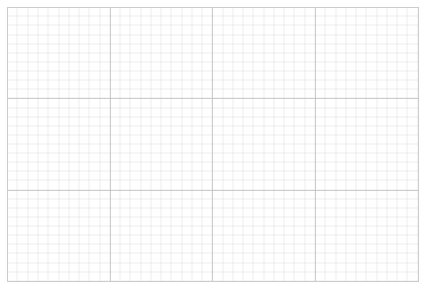

In [49]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95])
ax.set_xlim(0,4)
ax.set_ylim(0,3)
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()


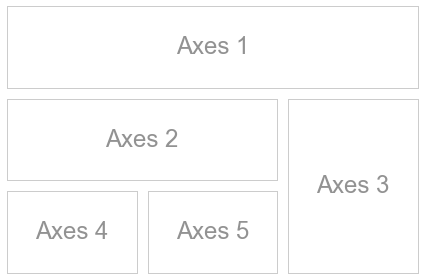

In [51]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(6, 4))
G = gridspec.GridSpec(3, 3)
axes_1 = plt.subplot(G[0, :])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 1', ha='center', va='center', size=24, alpha=.5)
axes_2 = plt.subplot(G[1, :-1])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 2', ha='center', va='center', size=24, alpha=.5)
axes_3 = plt.subplot(G[1:, -1])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 3', ha='center', va='center', size=24, alpha=.5)
axes_4 = plt.subplot(G[-1, 0])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 4', ha='center', va='center', size=24, alpha=.5)
axes_5 = plt.subplot(G[-1, -2])
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Axes 5', ha='center', va='center', size=24, alpha=.5)
plt.tight_layout()
plt.show()


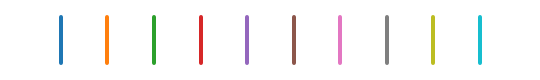

In [57]:
size = 512, 64
dpi = 144.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0.1, 1, .8], frameon=False)
for i in range(1,11):
    plt.plot([i, i], [0, 1], lw=2.0)
plt.xlim(0, 11)
plt.xticks(())
plt.yticks(())
plt.show()


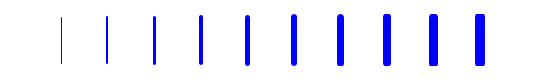

In [58]:
size = 512, 64
dpi = 144.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0.1, 1, .8], frameon=False)
for i in range(1,11):
    plt.plot([i, i], [0, 1],color='b', lw=i/2.0)
plt.xlim(0, 11)
plt.xticks(())
plt.yticks(())
plt.show()

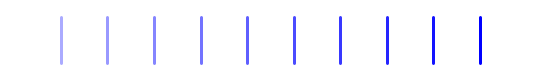

In [59]:
size = 512, 64
dpi = 144.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0.1, 1, .8], frameon=False)
for i in range(1,11):
    plt.plot([i, i], [0, 1],color='b', alpha = 0.25+0.75*i/10.0)
plt.xlim(0, 11)
plt.xticks(())
plt.yticks(())
plt.show()

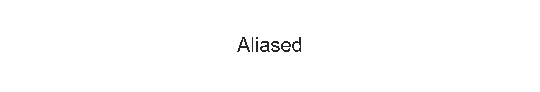

In [64]:
size = 512, 64
dpi = 144.0
figsize= size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)
plt.rcParams['text.antialiased'] = False
plt.text(0.5, 0.5, "Aliased", ha='center', va='center')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(())
plt.yticks(())
plt.show()


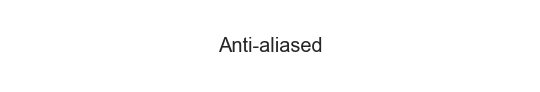

In [65]:
size = 512, 64
dpi = 144.0
figsize= size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)
plt.rcParams['text.antialiased'] = True
plt.text(0.5, 0.5, "Anti-aliased", ha='center', va='center')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(())
plt.yticks(())
plt.show()

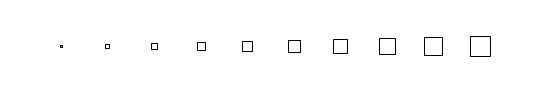

In [63]:
size = 512, 64
dpi = 144.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)
for i in range(1, 11):
    plt.plot([i, ], [1, ], 's', markersize=i, markerfacecolor='w',
markeredgewidth=.5, markeredgecolor='k')
plt.xlim(0, 11)
plt.xticks(())
plt.yticks(())
plt.show()

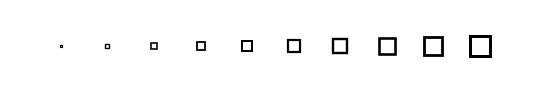

In [67]:
size = 512, 64
dpi = 144.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)
for i in range(1, 11):
    plt.plot([i, ], [1, ], 's', markersize=i, markerfacecolor='w',
markeredgewidth=0.5+i/10, markeredgecolor='k')
plt.xlim(0, 11)
plt.xticks(())
plt.yticks(())
plt.show()

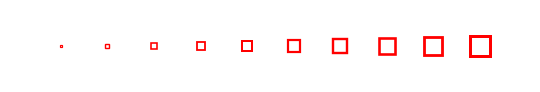

In [73]:
size = 512, 64
dpi = 144.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)
for i in range(1, 11):
    plt.plot([i, ], [1, ], 's', markersize=i, markerfacecolor='w',
markeredgewidth=0.5+i/10, markeredgecolor=(1,0,0,1))
plt.xlim(0, 11)
plt.xticks(())
plt.yticks(())
plt.show()

In [74]:
import numpy as np
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat')
data['a']


array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [77]:
"""
The scipy.linalg.det() function computes the determinant of a square matrix

"""

from scipy import linalg
arr = np.array([[1, 2],[3, 4]])
linalg.det(arr)

-2.0

In [82]:
"""
The scipy.linalg.inv() function computes the inverse of a square matrix

"""

arr = np.array([[1, 2],[3, 4]])
iarr=linalg.inv(arr)

In [83]:
np.allclose(np.dot(arr, iarr), np.eye(2))
#compare each element in two matrix

True

In [84]:
from scipy.interpolate import interp1d
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise
linear_interp = interp1d(measured_time, measures)
"""
Then the result can be evaluated at the time of
interest:
>>> interpolation_time = np.linspace(0, 1, 50)
>>> linear_results = linear_interp(interpolation_time)

A cubic interpolation can also be selected by providing the kind optional keyword argument:
>>> cubic_interp = interp1d(measured_time, measures, kind='cubic')
>>> cubic_results = cubic_interp(interpolation_time)


"""


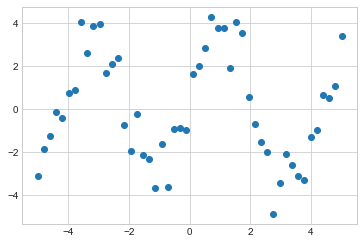

In [86]:
"""
曲线拟合

"""
from scipy import optimize
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
plt.scatter(x_data,y_data)
plt.show()

In [88]:
def test_func(x,a,b):
    return a * np.sin(b*x)
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[ 3.37907694  1.46893585]


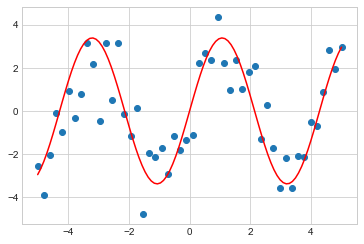

In [89]:
from scipy import optimize
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
plt.scatter(x_data,y_data)
x_fit = np.linspace(-5, 5, num=100)
y_fit = 3.37907694 * np.sin(1.46893585*x_fit)
plt.plot(x_fit,y_fit,color='red')
plt.show()

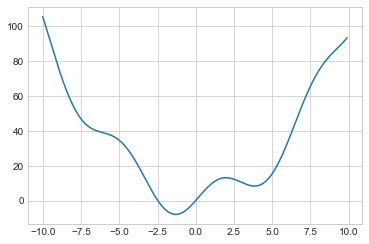

In [90]:
"""
找标量函数的最小值
Searching for minimum can be done with scipy.optimize.minimize(), given a starting point x0, it returns
the location of the minimum that it has found:
"""
def f(x):
    return x**2 + 10.0*np.sin(x)
x = np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.show()

In [91]:
optimize.minimize(f, x0=0, method="L-BFGS-B")

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])

In [92]:
"""
Global minimum: A possible issue with this approach is that, if the function has local minima, the algorithm
may find these local minima instead of the global minimum depending on the initial point x0:

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to
costlier global optimization. To find the global minimum, we use scipy.optimize.basinhopping() (added
in version 0.12.0 of Scipy). It combines a local optimizer with sampling of starting points:


"""

optimize.basinhopping(f, 0)

                        fun: -7.945823375615284
 lowest_optimization_result:       fun: -7.945823375615284
 hess_inv: array([[ 0.08581536]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1503
                        nit: 100
                       njev: 501
                          x: array([-1.30644001])

In [93]:
"""
To find a root, i.e. a point where f (x) = 0, of the function f above we can use scipy.optimize.root():


"""

root = optimize.root(f, x0=1) # our initial guess is 1
root

    fjac: array([[-1.]])
     fun: array([ 0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([  1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([ 0.])